<a href="https://colab.research.google.com/github/basithks/datascience/blob/main/prgm15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

wine_data = pd.read_csv("/content/winequality-red.csv", sep=',')
print(wine_data.head())


if 'type' in wine_data.columns:
    wine_data = pd.get_dummies(wine_data, columns=['type'], drop_first=True)


X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
y_pred = dt_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.54      0.91      0.68       130
           6       0.53      0.31      0.39       132
           7       0.42      0.24      0.30        42
           8       1.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.75      0.24      0.23       320
weighted avg       0.54      0.53      0.48       320



In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   8   2   0   0]
 [  0   0 118  11   1   0]
 [  0   0  82  41   9   0]
 [  0   0   9  23  10   0]
 [  0   0   0   1   4   0]]


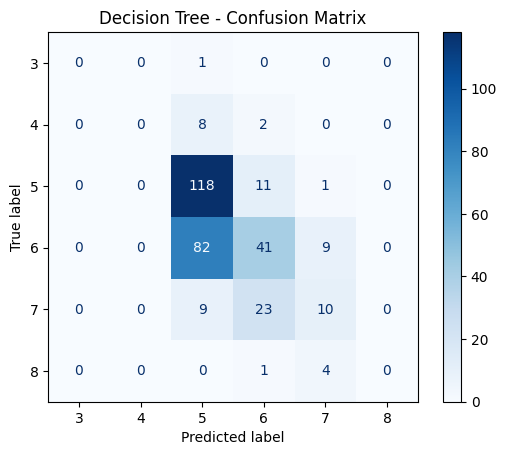

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

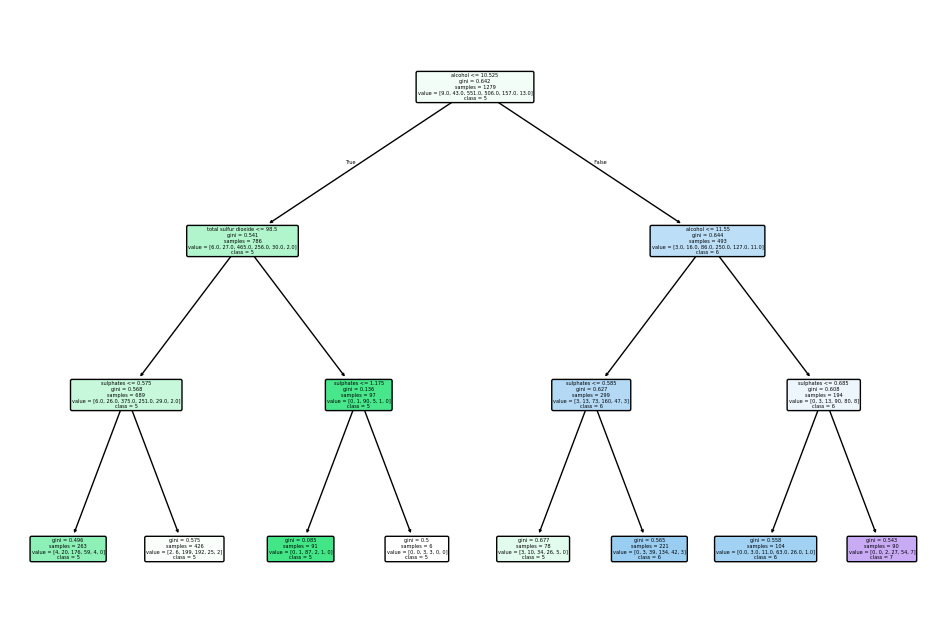

In [9]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=
[str(label) for label in dt_classifier.classes_], filled=True, rounded=True)
plt.show()